# 机器学习课程大作业
我们选择的数据集：`糖尿病预测`。本实验使用的数据在`.ipynb`同目录下的data文件中（路径：`data/diabetes_dataset.csv`）

<!-- Group menbers: 陈绮琳(2210515021), 贺祥瑞(2210515004). -->

### 目录
* [任务描述与分析](#bb)
* [数据统计分析与可视化](#datadesc)
* [数据预处理](#datapreprocess)
* [模型选择与可视化](#modelselection)
* [模型优化](#modelopt)

<a id='bb'></a>
## 任务描述与分析
### 任务描述
数据集包含患者的医疗和人口统计数据及其糖尿病状态（阳性或阴性）。它由各种特征组成，例如年龄、性别、体重指数 (BMI)、高血压、心脏病、吸烟史、HbA1c 水平和血糖水平。
请用该数据集构建机器学习模型，使得可以根据**患者的病史和人口统计信息**预测**患者患糖尿病的可能性**。

### 数据描述
TODO

### 目标函数
TODO

### 总结
从上述分析来看，该任务是一个**分类**任务，根据不同维度的患者信息和人口统计信息判断患者是否有患病可能。因此我们可以使用一些分类任务算法，例如`逻辑回归`、`贝叶斯分类`、`决策树`、`支持向量机`。

<a id='datadesc'></a>
## 数据统计分析与可视化
### 数据统计分析

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc as sklearn_auc
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('data/diabetes_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# 特征值1：gender
set(data['gender'].values)

{'Female', 'Male', 'Other'}

In [5]:
# 特征值2：smoking_history
set(data['smoking_history'].values)

{'No Info', 'current', 'ever', 'former', 'never', 'not current'}

In [6]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(data['gender'])
data['gender'] = labelEncoder.transform(data['gender'])
gender_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

labelEncoder.fit(data['smoking_history'])
data['smoking_history'] = labelEncoder.transform(data['smoking_history'])
smoking_history_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

In [7]:
gender_mapping

{'Female': 0, 'Male': 1, 'Other': 2}

In [8]:
smoking_history_mapping

{'No Info': 0,
 'current': 1,
 'ever': 2,
 'former': 3,
 'never': 4,
 'not current': 5}

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [10]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [11]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
# 目标值
set(data['diabetes'].values)

{0, 1}

### 数据可视化

#### 散点图

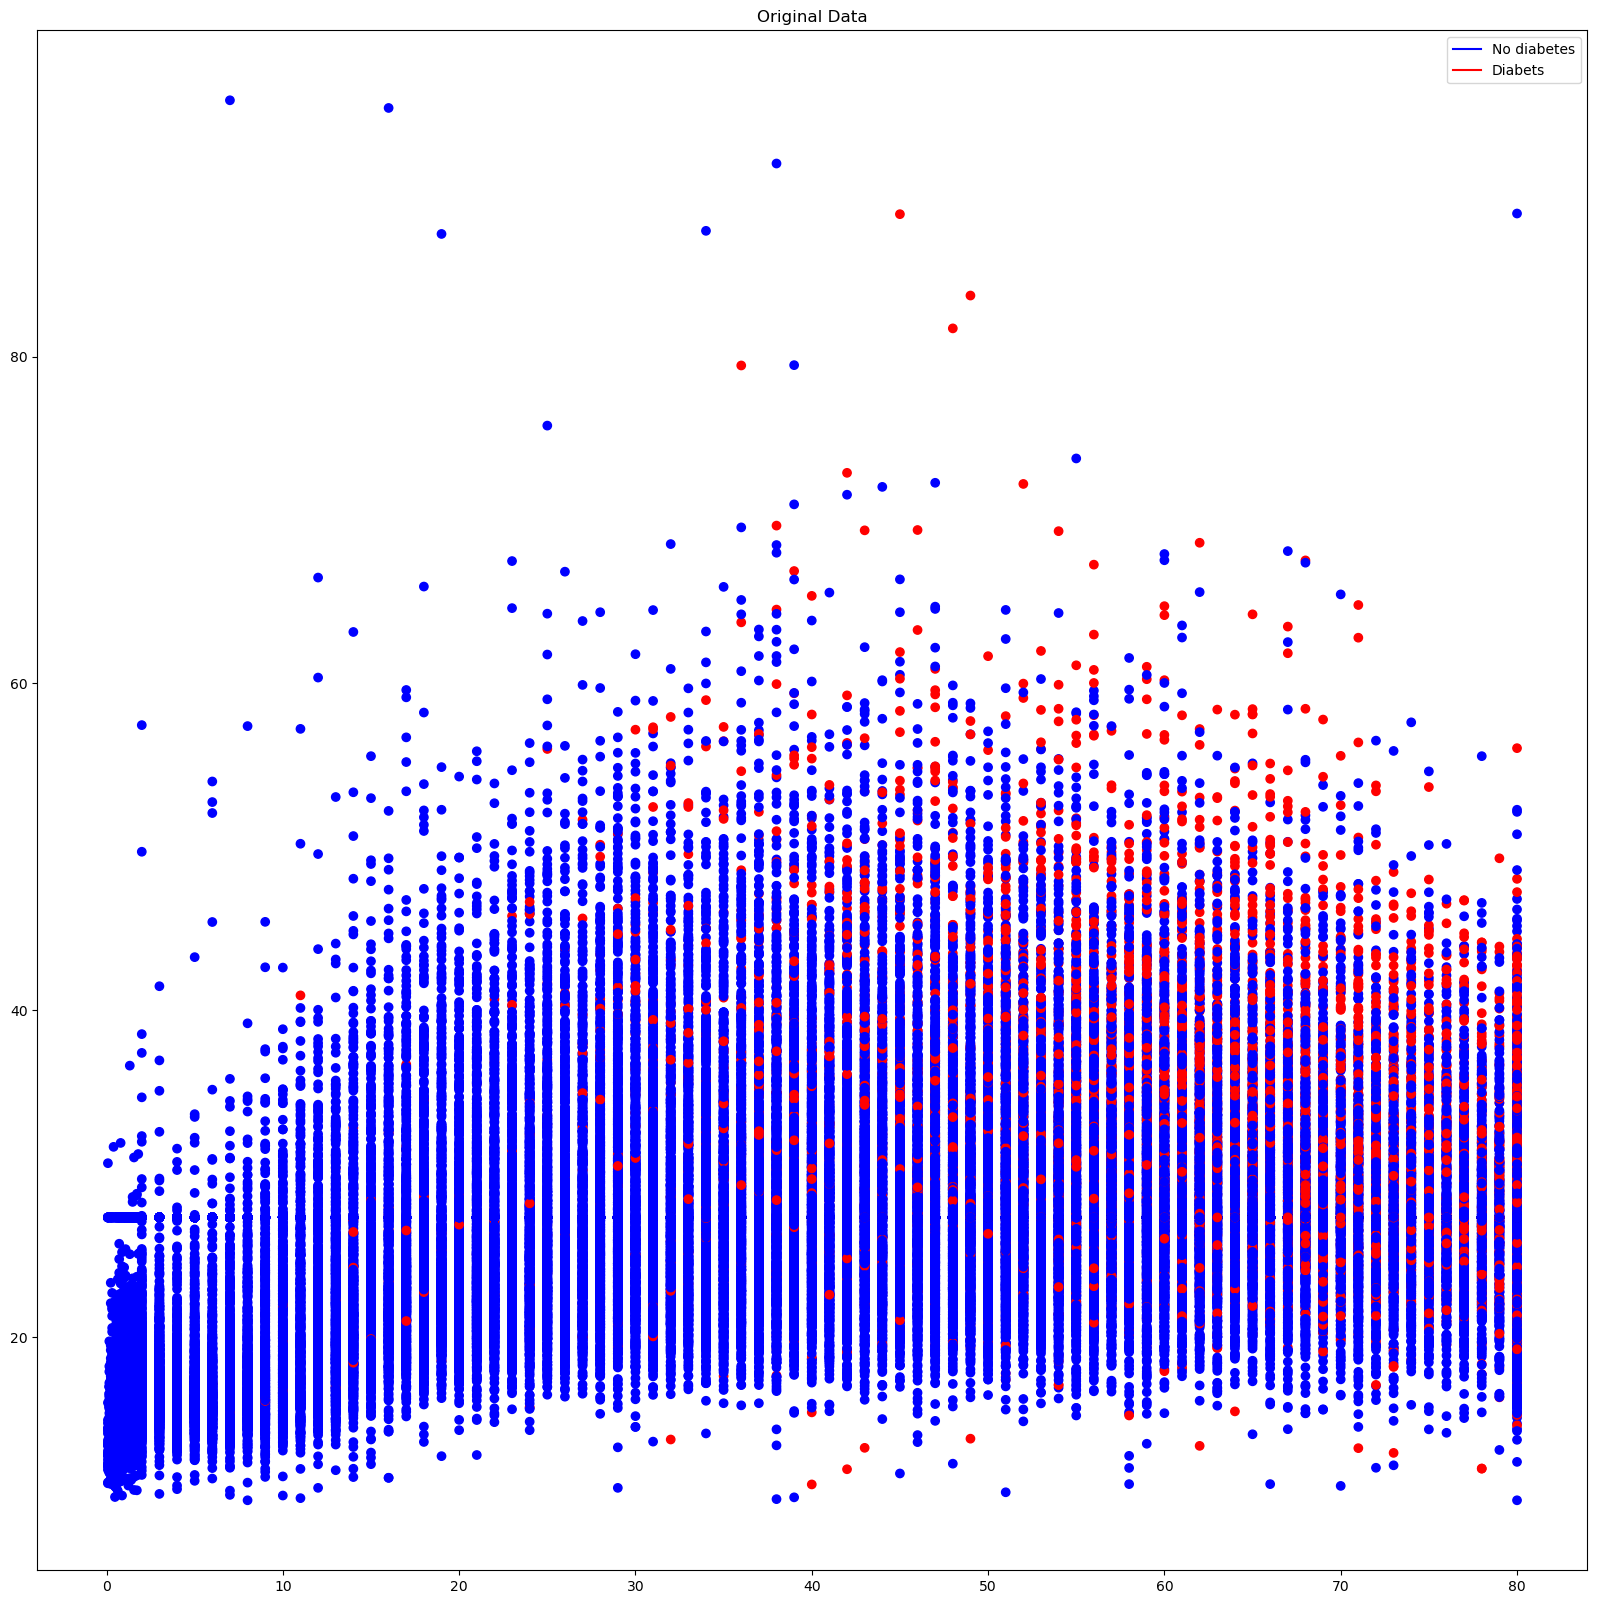

In [13]:
# original data
fig, ax = plt.subplots(figsize=(20, 20))
# 年龄 bmi
scatter = ax.scatter(data.iloc[:, 1], data.iloc[:, 5], color=['b' if num == 0 else 'r' for num in data.iloc[:, -1]])
legend_elements = [plt.Line2D([0], [0], color='b', label='No diabetes'),
                   plt.Line2D([0], [0], color='r', label='Diabets')]
plt.legend(handles=legend_elements, loc='best')
ax.set_title("Original Data")
plt.show()

#### 直方图

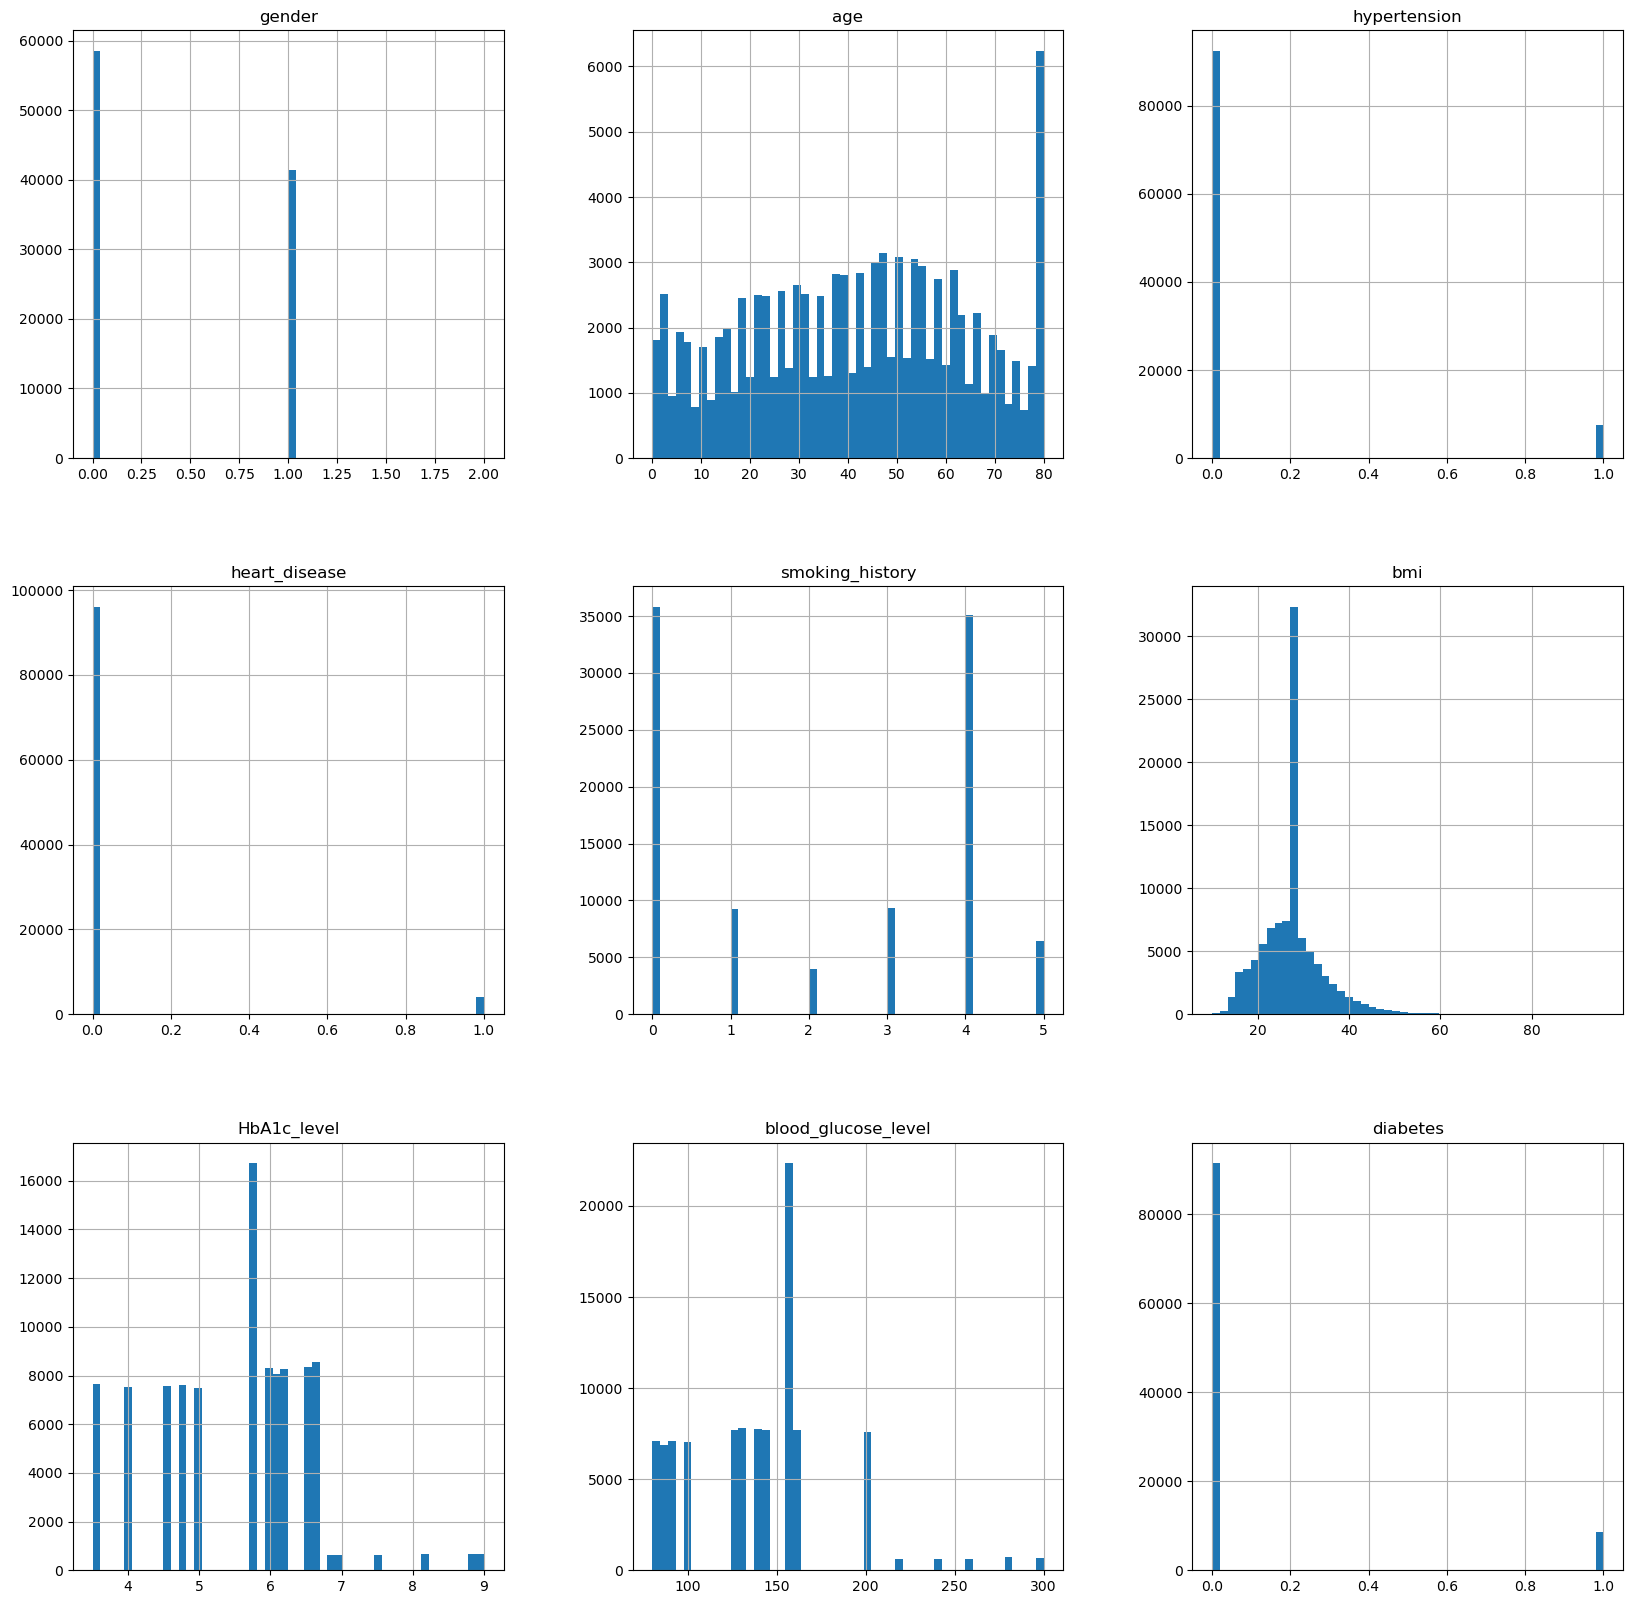

In [14]:
# 不同列的统计信息
data.hist(bins=50, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(20,20))
plt.show()

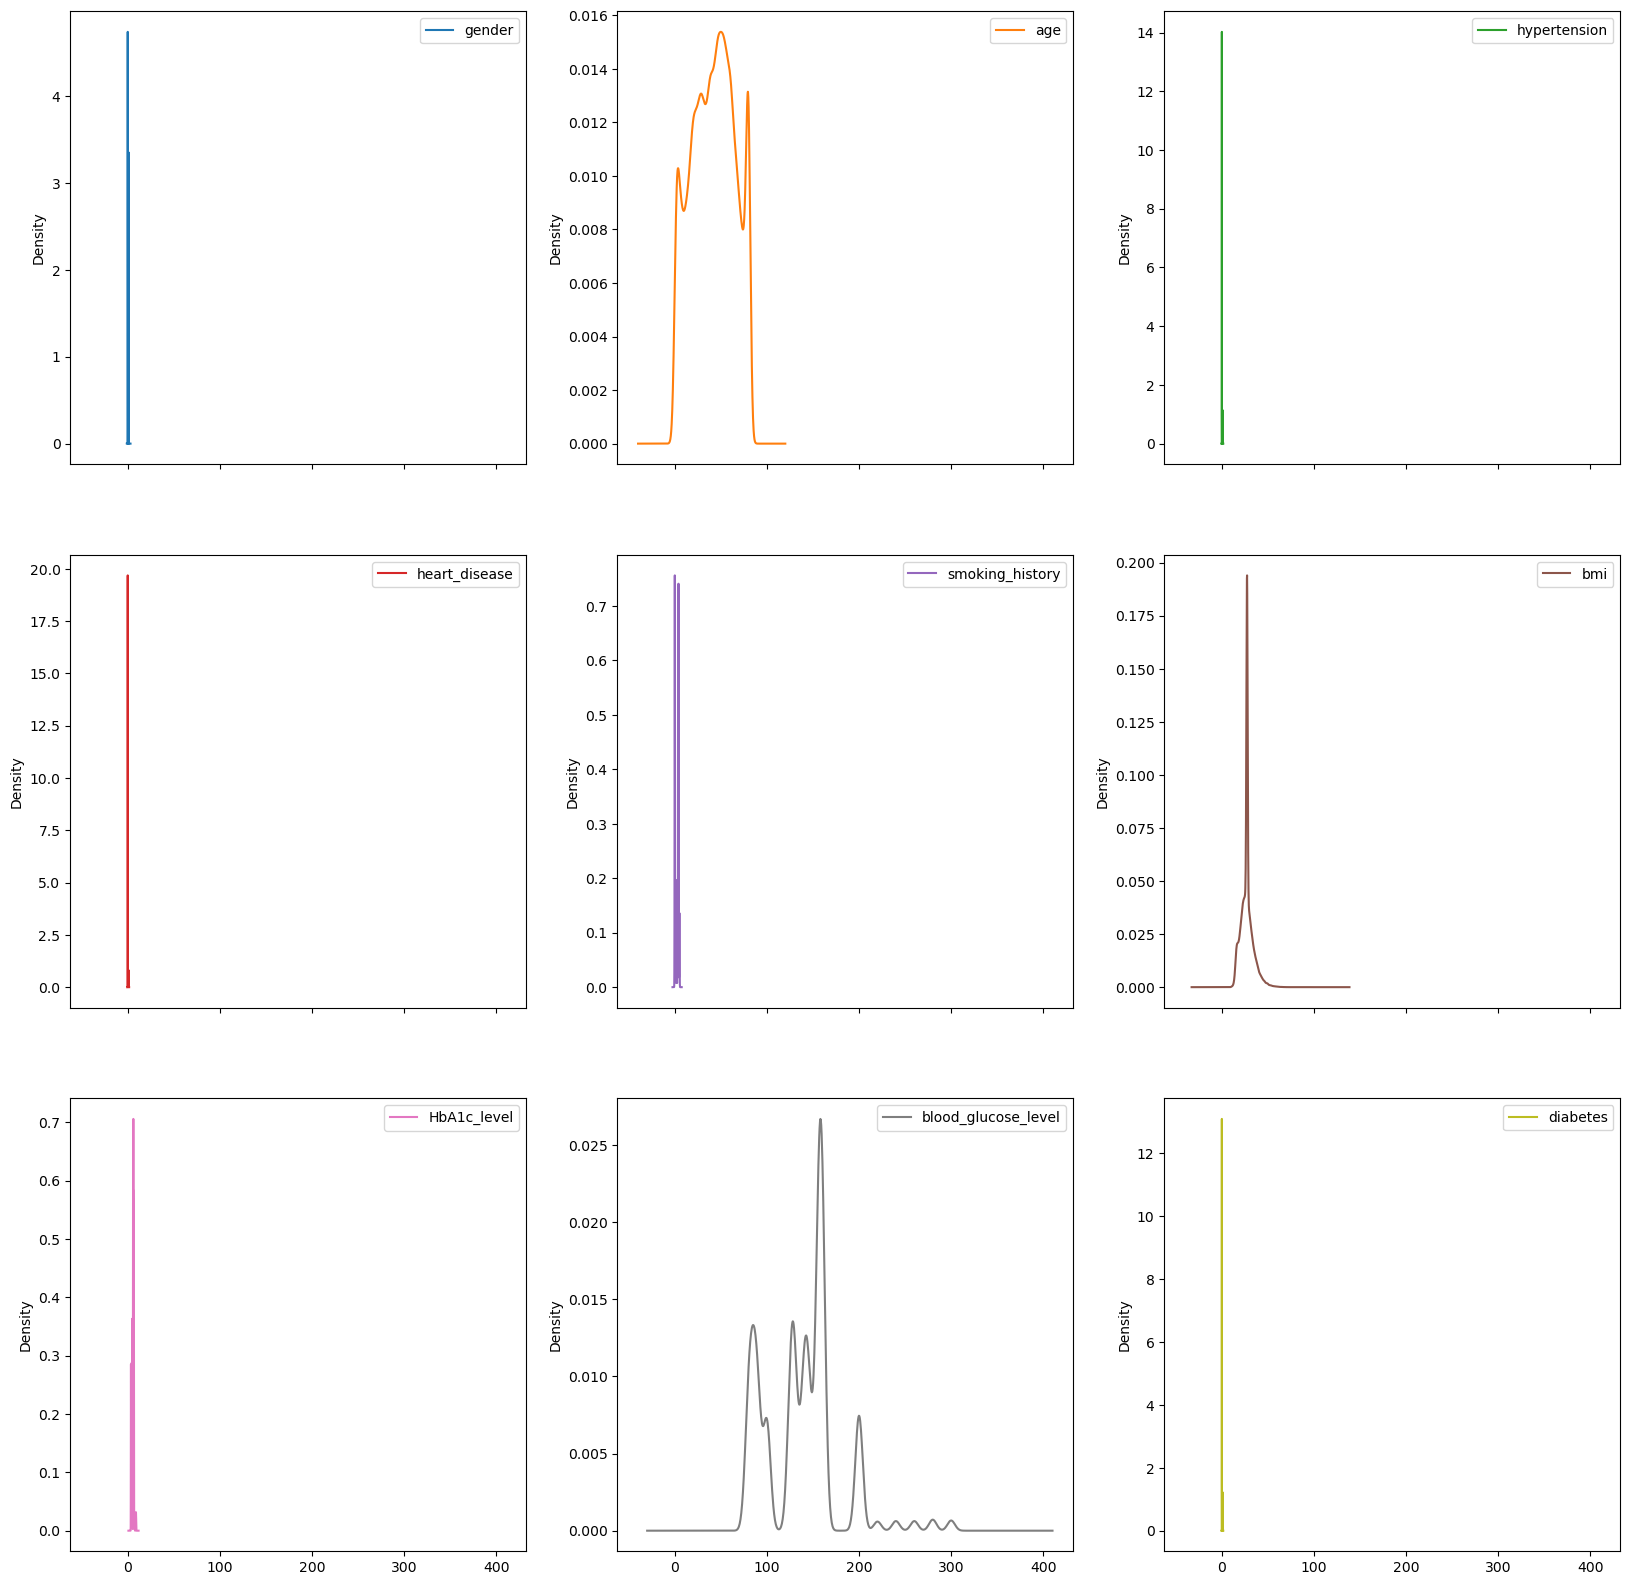

In [15]:
# 不同列的统计信息
data.plot(kind='density', subplots=True, layout=(3,3), sharex=True, legend=True, fontsize=10, figsize=(20,20))
plt.show()

<a id='datapreprocess'></a>
## 数据预处理
### 数据清洗

In [16]:
# 缺失值：smoking_history的No Info
len(data[data['smoking_history'] == 0])

35816

使用0进行替换。

### 特征构造

In [17]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [18]:
X_scaled = pd.DataFrame(X)
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-8.095480e-16,4.729328e-17,-2.405809e-16,3.437979e-15,-5.259104e-16,1.241318e-16,4.485878e-16,3.172174e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-8.410467e-01,-1.856658e+00,-2.844394e-01,-2.025777e-01,-1.153468e+00,-2.608320e+00,-1.893686e+00,-1.426210e+00
25%,-8.410467e-01,-7.943364e-01,-2.844394e-01,-2.025777e-01,-1.153468e+00,-5.561106e-01,-6.794897e-01,-9.349053e-01
50%,-8.410467e-01,4.948073e-02,-2.844394e-01,-2.025777e-01,4.341281e-01,-1.155837e-04,2.545078e-01,4.770422e-02
75%,1.187234e+00,8.044750e-01,-2.844394e-01,-2.025777e-01,9.633267e-01,3.404125e-01,6.281067e-01,5.144437e-01
max,3.215514e+00,1.692704e+00,3.515687e+00,4.936379e+00,1.492525e+00,1.030161e+01,3.243300e+00,3.978142e+00


### 划分训练集和测试集

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=66)

In [20]:
num_folds = 10
scoring = 'f1'

<a id='modelselection'></a>
## 模型选择与可视化
### 模型选择

In [52]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('NaiveBayes', GaussianNB()))

In [53]:
names = []
kfold_results = []
train_predicts = []
test_predicts = []
for name, model in models:
    names.append(name)

    # K Fold analysis:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, Y_train)
    t_predicted = res.predict(X_train)
    train_predicts.append(t_predicted)

    # Test results
    predicted = res.predict(X_test)
    test_predicts.append(predicted)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.731568 (0.016873)
DecisionTree: 0.728643 (0.011424)
NaiveBayes: 0.531081 (0.020894)


### K-Flod结果

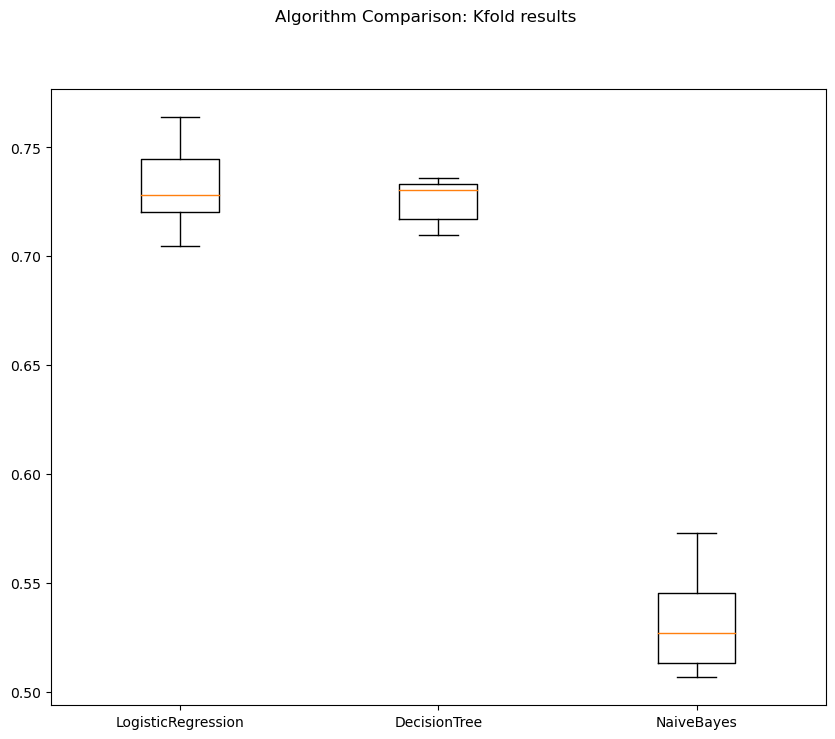

In [23]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,8)
plt.show()

### 准确率

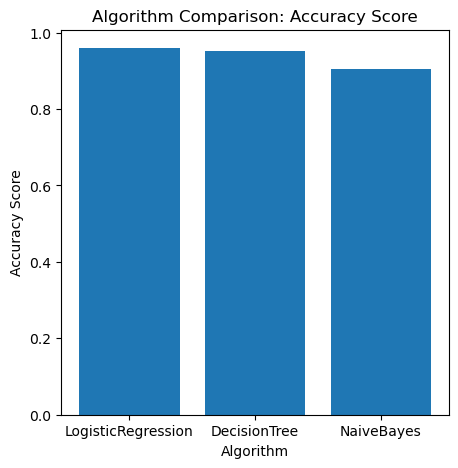

In [24]:
# different number of cluster
plt.figure(figsize=(5, 5))
accuracy_scores = []
for index, name in enumerate(models):
    accuracy_scores.append(accuracy_score(Y_test, test_predicts[index]))
plt.bar(names, accuracy_scores)
plt.title("Algorithm Comparison: Accuracy Score")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

### ROC曲线


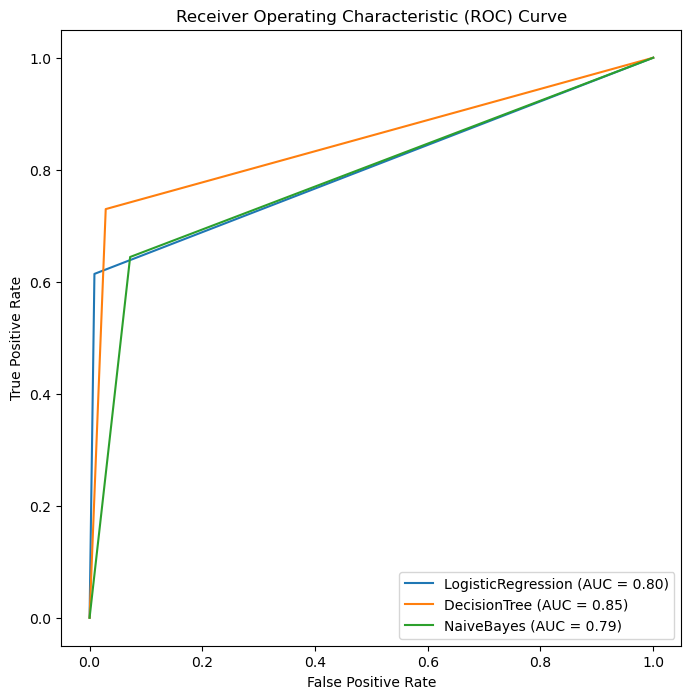

In [25]:
plt.figure(figsize=(8, 8))
for index, name in enumerate(models):
    fpr, tpr, thresholds = roc_curve(Y_test, test_predicts[index])
    model_auc = sklearn_auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name[0], model_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

结论：选择`DecisionTree`。

<a id='modelopt'></a>
## 模型优化


In [26]:
tree_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

In [27]:
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [28]:
opt_tree_classifier = DecisionTreeClassifier(**best_params)
res = opt_tree_classifier.fit(X_train, Y_train)
opt_tree_predicted = res.predict(X_test)

opt_tree_accuracy = opt_tree_classifier.score(X_test, Y_test)

In [29]:
opt_tree_accuracy

0.9706333333333333

### 可视化

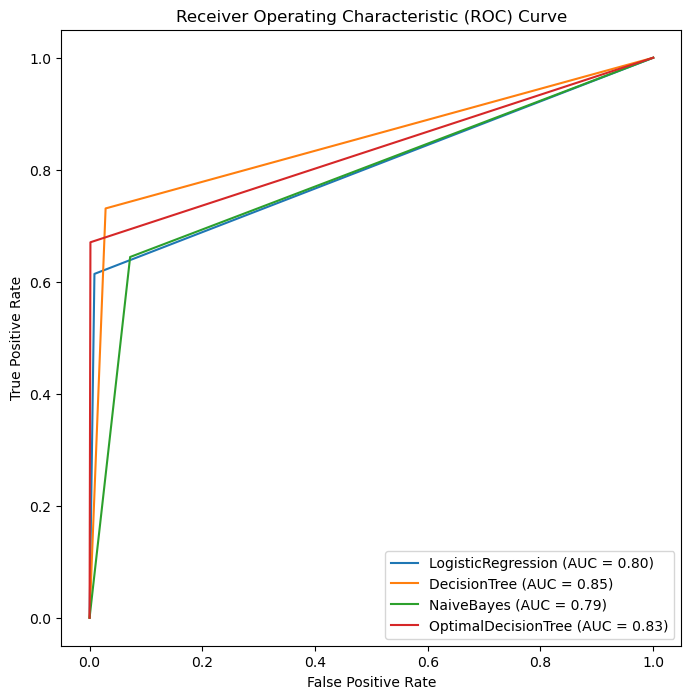

In [54]:
names.append('OptimalDecisionTree')
models.append(('OptimalDecisionTree', opt_tree_classifier))
test_predicts.append(opt_tree_predicted)

plt.figure(figsize=(8, 8))
for index, name in enumerate(models):
    fpr, tpr, thresholds = roc_curve(Y_test, test_predicts[index])
    model_auc = sklearn_auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name[0], model_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

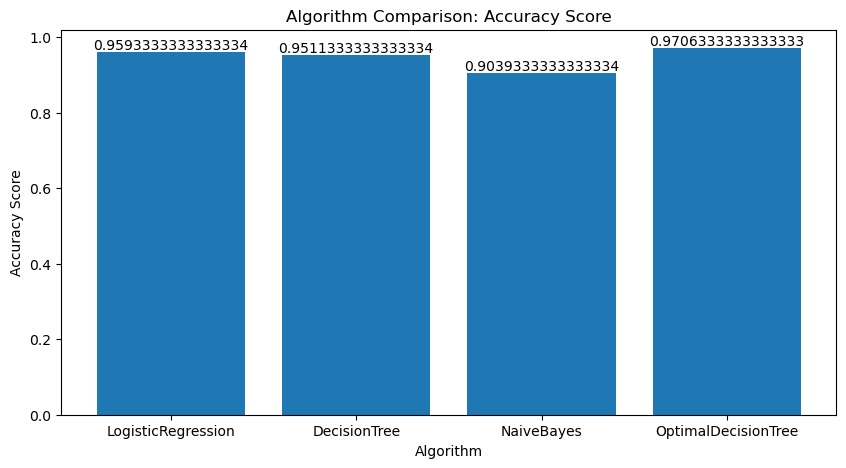

In [86]:
# different number of cluster
fig, ax = plt.subplots(figsize=(10, 5))
accuracy_scores = []
for index, name in enumerate(models):
    accuracy_scores.append(accuracy_score(Y_test, test_predicts[index]))

# Plot the bar chart
bars = ax.bar(names, accuracy_scores)

# Add the numbers on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')
# plt.bar(names, accuracy_scores)
plt.title("Algorithm Comparison: Accuracy Score")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

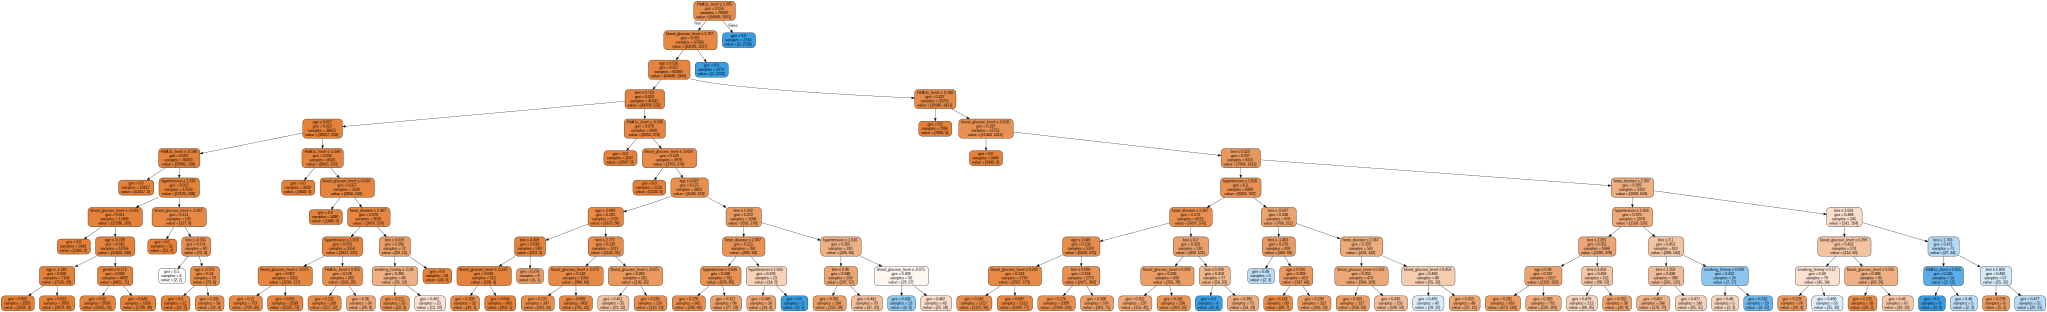

In [72]:
dot_data = export_graphviz(opt_tree_classifier, out_file=None, feature_names=data.iloc[:, :-1].columns.tolist(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph

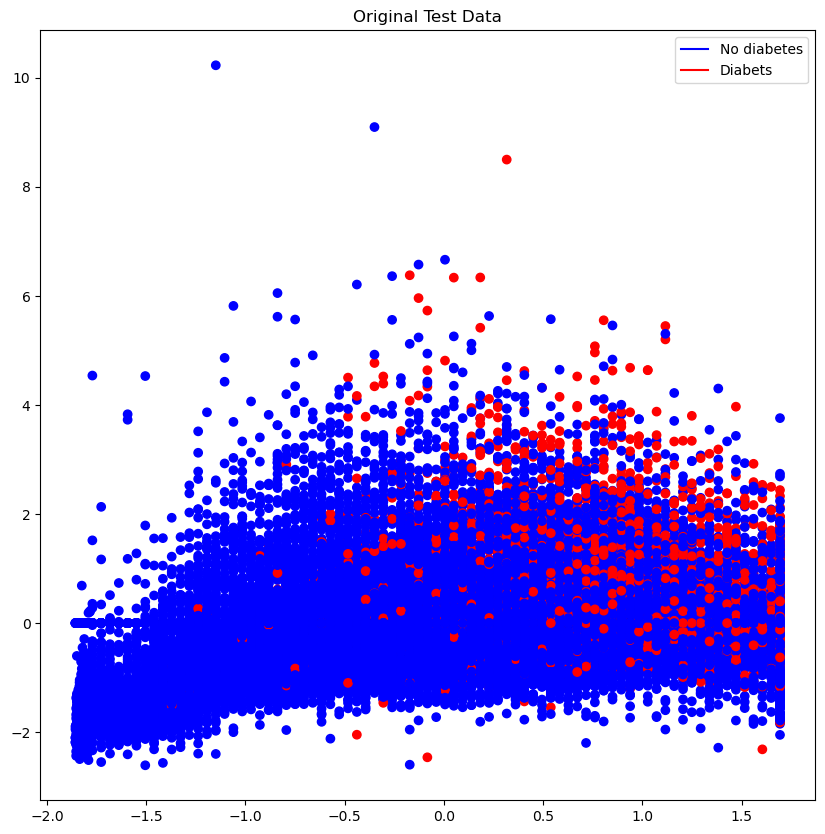

In [85]:
# original data
fig, ax = plt.subplots(figsize=(10, 10))
# 年龄 bmi
scatter = ax.scatter(X_test[:, 1], X_test[:, 5], color=['b' if num == 0 else 'r' for num in Y_test])
legend_elements = [plt.Line2D([0], [0], color='b', label='No diabetes'),
                   plt.Line2D([0], [0], color='r', label='Diabets')]
plt.legend(handles=legend_elements, loc='best')
ax.set_title("Original Test Data")
plt.show()

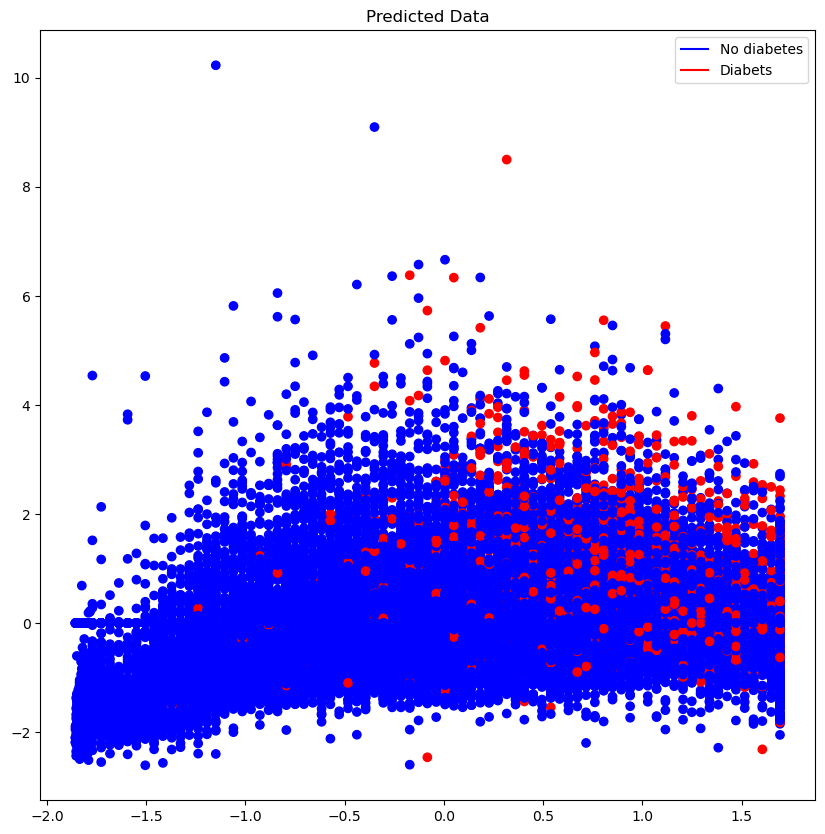

In [ ]:
# original data
fig, ax = plt.subplots(figsize=(10, 10))
# 年龄 bmi
scatter = ax.scatter(X_test[:, 1], X_test[:, 5], color=['b' if num == 0 else 'r' for num in opt_tree_predicted])
legend_elements = [plt.Line2D([0], [0], color='b', label='No diabetes'),
                   plt.Line2D([0], [0], color='r', label='Diabets')]
plt.legend(handles=legend_elements, loc='best')
ax.set_title("Predicted Data")
plt.show()